In [1]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [8]:
import numpy as np
import pylab as pl
from matplotlib import pyplot
from pykalman import KalmanFilter
from utils.sequences_treatment import *
from utils.linear_systems import *

In [9]:
kf=loadKF()

In [10]:
numberSamples=1
T=20

In [11]:
(objectives,observations,_)=sampleKFSequence(kf,T,numberSamples=numberSamples)
print(objectives.shape)
print(observations.shape)
#print(observations)

(1, 20, 1)
(1, 20, 1)


/Users/antoine/anaconda3/lib/python3.6/site-packages/pykalman-0.9.5-py3.6.egg/pykalman/standard.py:1108: RuntimeWarning: covariance is not positive-semidefinite.
  transition_covariance.newbyteorder('=')


In [12]:
sigma=randomSigma(T,numberSamples=numberSamples,p0=0)
observations_corrupted=corruptKFSequence(observations,sigma)

In [13]:
filtered_objectives, objective_covariances, filtered_states, state_covariances=KFFilterAll(kf,observations_corrupted)

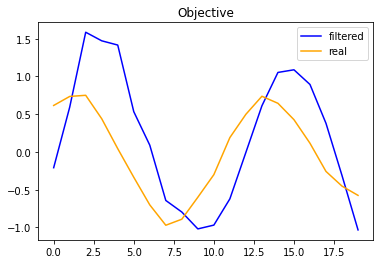

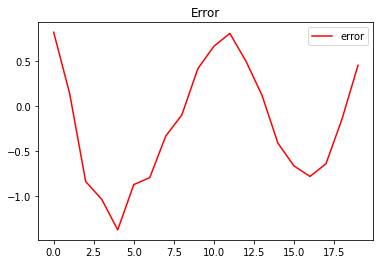

In [14]:
i=0
pyplot.title('Objective')
pyplot.plot(filtered_objectives[i,:], color='blue', label='filtered')
pyplot.plot(objectives[i,:], color='orange', label='real')
pyplot.legend()
pyplot.show()

pyplot.title('Error')
pyplot.plot(objectives[i,:]-filtered_objectives[i,:], color='red', label='error')
pyplot.legend()
pyplot.show()

In [9]:
filtered_state=None
filtered_state_covariance=None
for t in range(T):
    filtered_state,filtered_state_covariance,filtered_objective,filtered_objective_covariance=KFFilterOne(kf, observations_corrupted[0,t,:], state_mean=filtered_state, state_mean_covariance=filtered_state_covariance)
    print(filtered_state)

[0.62929065 0.9949382 ]
[0.66477821 0.92116679]
[0.73486592 0.84497916]
[1.33151996 1.03038977]
[1.58540498 1.00745219]
[1.83801992 0.98795142]
[1.87965842 0.75176938]
[2.17674023 0.79998332]
[2.11813008 0.44783277]
[ 1.90173126 -0.01271168]
[ 2.07293789 -0.03362091]
[ 1.76185939 -0.49682743]
[ 1.63755704 -0.72253501]
[ 1.90743957 -0.62849967]
[ 1.78207596 -0.85074826]
[ 1.98288869 -0.84905935]
[ 2.20944118 -0.87084996]
[ 1.87641855 -1.19969415]
[ 1.58016139 -1.45238285]
[ 1.51667006 -1.56901583]
[ 1.22188585 -1.75628799]
[ 1.18578294 -1.82667304]
[ 0.90857364 -1.95895037]
[ 0.65762757 -2.05143699]
[ 0.23367612 -2.15016812]
[ 0.05100436 -2.15683249]
[-0.03429601 -2.13011523]
[-0.28724321 -2.12209043]
[-0.56882463 -2.09293072]
[-0.90240926 -2.04354037]
[-1.24335796 -1.96341207]
[-1.53026993 -1.84398775]
[-1.74658955 -1.6883807 ]
[-1.93137622 -1.50990188]
[-2.12589509 -1.31961464]
[-2.27158786 -1.10581534]
[-2.36278389 -0.87177737]
[-2.5566728  -0.65951102]
[-2.56614848 -0.39011915]
[-2.